<a href="https://colab.research.google.com/github/erendagasan/keras-kmnist-img-classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [3]:
builder = tfds.builder("kmnist")
builder.info

tfds.core.DatasetInfo(
    name='kmnist',
    version=3.0.1,
    description='Kuzushiji-MNIST is a drop-in replacement for the MNIST dataset (28x28 grayscale, 70,000 images), provided in the original MNIST format as well as a NumPy format. Since MNIST restricts us to 10 classes, we chose one character to represent each of the 10 rows of Hiragana when creating Kuzushiji-MNIST.',
    homepage='http://codh.rois.ac.jp/kmnist/index.html.en',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@online{clanuwat2018deep,
      author       = {Tarin Clanuwat and Mikel Bober-Irizar and Asanobu Kitamoto and Alex Lamb and Kazuaki Yamamoto and David Ha},
      title        = {Deep Learning for Classical Japanese Literature},
      date 

In [4]:
train_ds, train_ds_info = tfds.load(name = "kmnist", split="train", with_info=True)
test_ds, test_ds_info = tfds.load(name = "kmnist", split="test", with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/kmnist/3.0.1.incompleteCEOD1Z/kmnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/kmnist/3.0.1.incompleteCEOD1Z/kmnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.


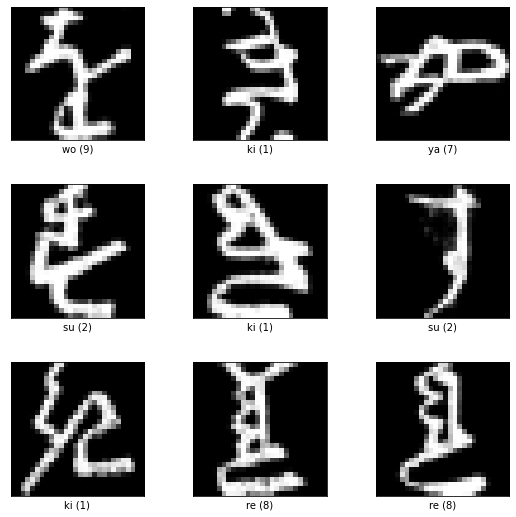

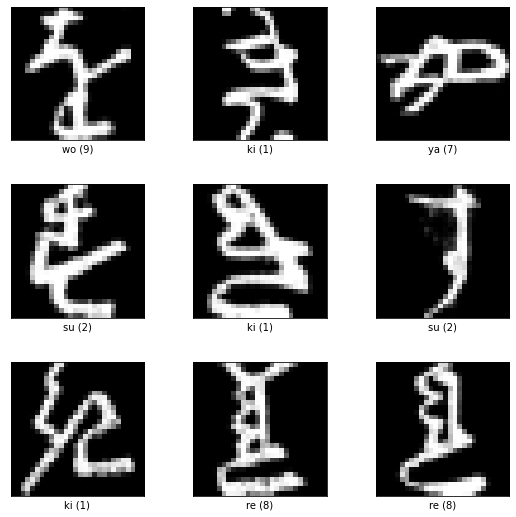

In [5]:
fig = tfds.show_examples(train_ds, train_ds_info)
fig

In [6]:
train_images = np.array([example["image"].numpy() for example in train_ds])
train_labels = np.array([example["label"].numpy() for example in train_ds])

test_images = np.array([example["image"].numpy() for example in test_ds])
test_labels = np.array([example["label"].numpy() for example in test_ds])

In [7]:
test_images.shape

(10000, 28, 28, 1)

In [8]:
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images /= 255
test_images /= 255

In [9]:
model = keras.Sequential(
    [
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(512, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")     
    ])

model.compile(optimizer="adam",
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ["accuracy"])

model.fit(train_images, train_labels, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2930 - accuracy: 0.9102
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1224 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0780 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0572 - accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0443 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0325 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0330 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0271 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0266 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.022

In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4872 - accuracy: 0.9204


[0.4871692359447479, 0.9204000234603882]

In [11]:
model = keras.Sequential(
    [
  keras.layers.AveragePooling2D(2, 1, input_shape=(28, 28, 1)),
  keras.layers.Conv2D(32, (2, 2), activation='relu'),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Conv2D(64, (2, 2), activation='relu'),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Dropout(0.5),
  keras.layers.Conv2D(64, (2, 2), activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation='softmax')
]
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 3ms/step - loss: 0.4467 - accuracy: 0.8596
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1821 - accuracy: 0.9454
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1341 - accuracy: 0.9593
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1078 - accuracy: 0.9668
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0911 - accuracy: 0.9726
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0810 - accuracy: 0.9748
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0726 - accuracy: 0.9771
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0658 - accuracy: 0.9793
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0625 - accuracy: 0.9805
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.05

In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2172 - accuracy: 0.9444


[0.21716657280921936, 0.9444000124931335]

In [23]:
np.round(model.predict(np.array([test_images[9999]])))

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

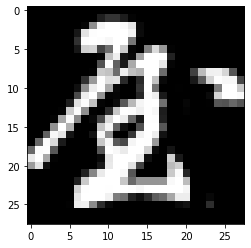

In [26]:
image = test_images[9999].reshape(28,28)

plt.imshow(image, cmap="Greys_r")